# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [1]:
import openpyxl
import pandas as pd

file_path = 'себестоимостьА_в1.xlsx'
df = pd.read_excel(file_path, sheet_name='Рецептура', skiprows=2, nrows=14, header=0, usecols='B:S')
df = df.dropna(how='all')

df

,Пшеничный хлеб,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,№,Наименование продукции,"Вес, кг.","Цена оптовая, руб.","Цена розничная, руб.",Физический расход ресурсов на единицу продукции,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Доля
1,NaN,NaN,NaN,NaN,NaN,Вода,Пшеничная мука,Дрожжи,Сахар,Соль,Куркума молотая,Топленное масло,Кунжутные семена,Масло оливковое,NaN,NaN,NaN,NaN
3,1,Хлеб Венгерский,0.4,35,50,0.2,0.4,0.02,0.02,0.01,0.005,0.1,NaN,NaN,NaN,NaN,NaN,0.3
4,2,"Хлеб ""Барбари""",0.25,28,40,0.07,0.25,0.01,0.06,0.015,NaN,0.06,0.05,NaN,NaN,NaN,NaN,0.2
5,3,Багет парижский,0.25,35,50,0.12,0.22,0.005,NaN,0.009,0.005,NaN,0.05,0.03,NaN,NaN,NaN,0.3
6,4,Чиабатта,0.25,35,50,0.12,0.23,0.01,NaN,0.015,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.2
7,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Цена ресурсов, руб.",NaN,NaN,NaN,NaN,7,10,184,19,7,290,105,83,260,0.0,0.0,0.0,NaN


In [2]:
def costs(d):
    for i in range(2, 6):
        # Получаем имя продукта
        name = str(df.iloc[i, 1])
        # Выбираем строки с 
        row1 = df.iloc[i, 5:14]
        row2 = df.iloc[9, 5:14]
        # Поэлементное умножение и суммирование только для числовых столбцов
        result = round((row1 * row2).sum(), 2)
        print(f"Себестоимость продукта {name}: {result}")

costs(df)  

Себестоимость продукта Хлеб Венгерский: 21.48
Себестоимость продукта Хлеб "Барбари": 16.52
Себестоимость продукта Багет парижский: 17.42
Себестоимость продукта Чиабатта: 18.09


In [4]:
def costs(d):
    
    for i in range(2, 6):
        name = str(df.iloc[i, 1])
        row1 = df.iloc[i, 5:14]
        row2 = df.iloc[9, 5:14]
        result = round((row1 * row2).sum(), 2)
        
        df.iat[i, df.columns.get_loc('Unnamed: 15')] = result
        
        return df
    
df.iloc[:,14] = df.iloc[:,14].astype(object)
df.iat[0, 14] = 'Себестоимость'
costs(df)


,Пшеничный хлеб,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,№,Наименование продукции,"Вес, кг.","Цена оптовая, руб.","Цена розничная, руб.",Физический расход ресурсов на единицу продукции,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Себестоимость,NaN,NaN,Доля
1,NaN,NaN,NaN,NaN,NaN,Вода,Пшеничная мука,Дрожжи,Сахар,Соль,Куркума молотая,Топленное масло,Кунжутные семена,Масло оливковое,NaN,NaN,NaN,NaN
3,1,Хлеб Венгерский,0.4,35,50,0.2,0.4,0.02,0.02,0.01,0.005,0.1,NaN,NaN,21.48,NaN,NaN,0.3
4,2,"Хлеб ""Барбари""",0.25,28,40,0.07,0.25,0.01,0.06,0.015,NaN,0.06,0.05,NaN,NaN,NaN,NaN,0.2
5,3,Багет парижский,0.25,35,50,0.12,0.22,0.005,NaN,0.009,0.005,NaN,0.05,0.03,NaN,NaN,NaN,0.3
6,4,Чиабатта,0.25,35,50,0.12,0.23,0.01,NaN,0.015,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.2
7,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Цена ресурсов, руб.",NaN,NaN,NaN,NaN,7,10,184,19,7,290,105,83,260,0.0,0.0,0.0,NaN


3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [22]:
df

,Пшеничный хлеб,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Себестоимость
0,№,Наименование продукции,"Вес, кг.","Цена оптовая, руб.","Цена розничная, руб.",Физический расход ресурсов на единицу продукции,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Себестоимость,NaN,NaN,Доля,NaN
1,NaN,NaN,NaN,NaN,NaN,Вода,Пшеничная мука,Дрожжи,Сахар,Соль,Куркума молотая,Топленное масло,Кунжутные семена,Масло оливковое,NaN,NaN,NaN,NaN,NaN
3,1,Хлеб Венгерский,0.4,35,50,0.2,0.4,0.02,0.02,0.01,0.005,0.1,NaN,NaN,21.48,NaN,NaN,0.3,16.52
4,2,"Хлеб ""Барбари""",0.25,28,40,0.07,0.25,0.01,0.06,0.015,NaN,0.06,0.05,NaN,16.52,NaN,NaN,0.2,17.42
5,3,Багет парижский,0.25,35,50,0.12,0.22,0.005,NaN,0.009,0.005,NaN,0.05,0.03,17.42,NaN,NaN,0.3,18.09
6,4,Чиабатта,0.25,35,50,0.12,0.23,0.01,NaN,0.015,NaN,NaN,NaN,0.05,18.09,NaN,NaN,0.2,NaN
7,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Цена ресурсов, руб.",NaN,NaN,NaN,NaN,7,10,184,19,7,290,105,83,260,0.0,0.0,0.0,NaN,NaN


4. Выполнить 3 с помощью "протягиваемых" формул.

In [ ]:
import xlwings as xw

xw.Book(file_path)
xw.sheets[0].activate()
xw.Range('B3:T3').merge()
xw.Range('T4:T6').merge() # Объединение ячеек # Задание цвета (желтый)
xw.Range('B3:T3').color =  (255, 255, 0)
# Задание цвета (оранжевый)
xw.Range('T4:T6').color = (255, 192, 0)
#Задание цвета (светло-желтый)
xw.Range('T7:T13').color = (255, 255, 167)

xw.Range('B3:T3').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
# Выравнивание текста по вертикали для объединенных ячеек от 83 до Т3
xw.Range('B3:T3').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter
xw.Range('T4:T6').HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
xw.Range('T4:T6').VerticalAlignment = xw.constants.VAlign.xlVAlignCenter
# Задание белого цвета текста
xw.Range('T4:T6').api.Font.Color = xw.utils.rgb_to_int((255, 255, 255))
#Выравнивание текста по горизонтали для объединенных ячеек от В3 до ТЗ xw.Range('83:T3').HorizontalAlignment xw.constants.HAlign.xlHAlignCenter #Выравнивание текста по вертикали для объединенных ячеек от В3 до ТЗ xw.Range('B3:T3'). VerticalAlignment xw.constants.VAlign.xlVAligncenter xw.Range('T4: T6').HorizontalAlignment xw.constants.HAlign.xlHAlignCenter xw.Range('T4: T6'). VerticalAlignment xw.constants.VAlign.xlVAligncenter #Задание белого цвета текста

# Задание жирного начертания для текста
xw.Range('T4:T6').api.Font.Bold = True
xw.Range('B3:T3').api.Font.Bold = True

rng = xw.Range('T4:T13')
rng.columns[0].column_width = len(rng.value[0])
# column_width устанавливает ширину столбца в таблице
# # rng.value[0] возвращает значение в столбце T

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [7]:
reviews = pd.read_csv('04_tables/data/reviews_sample.csv')
recipes = pd.read_csv('04_tables/data/recipes_sample.csv')
recipes = recipes[['id','name', 'minutes', 'submitted']]
print(len(reviews), len(recipes))

126696 30000


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [ ]:
df1_sample = reviews.sample(frac=0.05)
df2_sample = recipes.sample(frac=0.05)

with pd.ExcelWriter('recipes.xlsx', engine='openpyxl') as writer:  
    df1_sample.to_excel(writer, sheet_name='Отзывы')
    df2_sample.to_excel(writer, sheet_name='Рецепты')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [11]:
import xlwings as xw
import numpy as np

# Открываем ваш файл и выбираем лист
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']

# Предполагаем, что в нашем df есть столбец 'minutes' с продолжительностью рецепта в минутах
minutes = sheet.range('D2:D1502').value 
# Преобразуем минуты в секунды
seconds = [float(minute)*60 if minute is not None else None for minute in minutes]

# Устанавливаем название нового столбца
sheet.range('F1').value = 'seconds_assign'
# Добавляем новый столбец
sheet.range('F2').value = np.array(seconds).reshape(len(seconds),1)

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [12]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']
minutes = sheet.range('D2:D1502').value
sheet.range('G1').value = 'seconds_formula'

for i in range(2, 1502):
    # Устанавливаем формулу Excel для каждой ячейки столбца seconds_formula
    sheet.range(f'G{i}').formula = f'=D{i}*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [13]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']
xl_app = wb.app.api

sheet.range('G1:H1').api.Font.Bold = True
sheet.range('G1:H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter


6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [ ]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']
xl_app = wb.app.api

for cell in sheet.range('D2:D1503'):
    if cell.value:
        if cell.value < 5:
            cell.api.Interior.Color = 5296274  # Green
        elif 5 <= cell.value < 10:
            cell.api.Interior.Color = 65535  # Yellow
        else:
            cell.api.Interior.Color = 255 # Red

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [ ]:
from collections import Counter

wb = xw.Book('recipes.xlsx')
sheet_rec = wb.sheets['Рецепты']
sheet_rev = wb.sheets['Отзывы']

#rev_ids = sheet_rev.range('D2:D1502').value
#rec_ids = sheet_rec.range('B2:B1502').value
#sheet_rev.range('H1').value = 'n_reviews'

# Подсчет количества отзывов для каждого рецепта
values = sheet_rev.range('D2:D1502').value
reviews_count = Counter([value for value in values if value]) # словарь

sheet_rec.range('H1').value = 'n_reviews'

# Создание нового столбца с количеством отзывов в DataFrame рецептов
for i in range(2, 1502):
    rec_id = sheet_rec.range(f'B{i}').value
    review_count = reviews_count.get(rec_id, "нет данных")
    sheet_rec.range(f'H{i}').value = review_count

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [ ]:
import xlwings as xw

wb = xw.Book('recipes.xlsx')
sheet_rev = wb.sheets['Отзывы']
sheet_rec = wb.sheets['Рецепты']

def validate(rev, rec):
    recipe_ids = rec.range('B2:B1502').value  # Идентификаторы рецептов из листа Рецепты

    for i in range(2, 6337):  
        review_id = rev.range(f'D{i}').value # Идентификатор отзыва - 3-й столбец
        rating = rev.range(f'F{i}').value # Рейтинг - 6-й столбец
        # Проверка условий
        if (rating < 0 or rating > 5) or review_id not in recipe_ids:
            rev.range(f'A{i}:G{i}').api.font.color = 255  # Выделяем всю строку красным

validate(sheet_rev, sheet_rec)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [3]:
import xlwings as xw

file = pd.read_csv('04_tables/data/recipes_model.csv', delimiter = "\t")
file.to_excel('recipes_model.xlsx')

In [ ]:
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']
# записать данные на лист, начиная с ячейки A2
sheet.range('A2').value = df

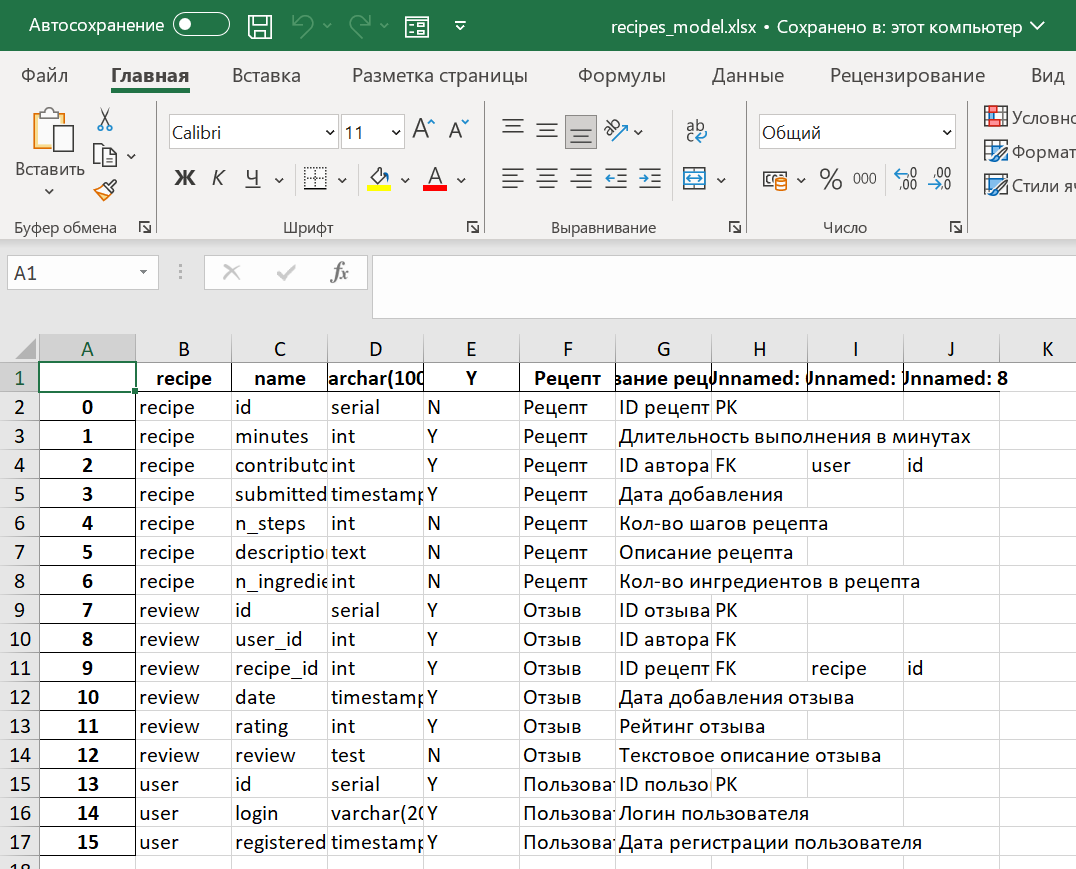

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
import xlwings as xw

# Откроем книгу Excel и выберем нужный лист, замените 'YourWorkbook.xlsx' и 'Sheet1' на реальные значения
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']

# Начиная со второй строки (первая строка это, по видимому, заголовки) и до последней заполненной строки.
for row in range(2, sheet.range('A' + str(sheet.cells.last_cell.row)).end('up').row + 1):
    # Формула SQL, включая логику PK, FK, и NOT NULL.
    sql_formula = (
        '=B{0} & " " & UPPER(C{0}) & '
        'IF(H{0} = "PK", " PRIMARY KEY", IF(H{0} = "FK", " REFERENCES " & H{0} & "(" & I{0} & ")", "")) &'
        'IF(E{0} = "Y" AND H{0} <> "PK", " NOT NULL", "")'
    ).format(row)
    
    # Вставляем формулу в столбец J каждой строки.
    sheet.range(f'J{row}').formula = sql_formula

# Сохраняем и закрываем книгу
wb.save()
wb.close()

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [ ]:
import xlwings as xw
from xlwings.utils import rgb_to_int

# Открываем нужный нашему файл
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']

# Заливаем шапку таблицы цветом
# Преобразуем шестнадцатиричный код цвета в RGB
color = rgb_to_int((0, 204, 255)) # Значение цвета 00ccff в RGB
sheet.range('A1:J1').api.Font.Bold = True # Делаем шрифт полужирным
sheet.range('A1:J1').color = color # Применяем цвет заливки

# Включаем автофильтр для диапазона A1:J1
sheet.range('A1:J1').api.AutoFilter()

# Применяем автоподбор ширины столбца для всего листа
sheet.autofit()

wb.save()
wb.close()

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 